# Chapter 03 회귀 알고리즘과 모델 규제

## 03-1 k-최근접 이웃 회귀

In [1]:
import numpy as np

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])


In [3]:
import matplotlib.pyplot as plt

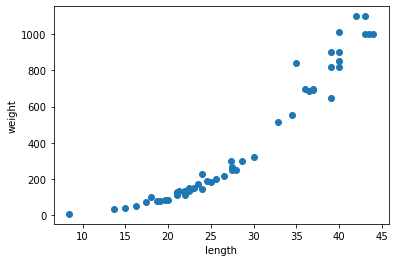

In [4]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train_input, test_input, train_target, test_target = \
                        train_test_split(perch_length, perch_weight, random_state=42)

In [7]:
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [8]:
test_array = test_array.reshape(2,2)
test_array.shape

(2, 2)

In [9]:
train_input = train_input.reshape(-1,1) 
test_input = test_input.reshape(-1,1)

In [10]:
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [11]:
from sklearn.neighbors import KNeighborsRegressor

In [12]:
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [13]:
knr.score(test_input, test_target)

0.992809406101064

In [14]:
from sklearn.metrics import mean_absolute_error

In [15]:
test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
mae

19.157142857142862

In [16]:
print(knr.score(train_input, train_target))

0.9698823289099254


In [17]:
knr.n_neighbors = 3

In [18]:
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [19]:
knr.score(train_input, train_target)

0.9804899950518966

In [20]:
knr.score(test_input, test_target)

0.9746459963987609

## 기본미션 - 확인문제 2

In [21]:
knr = KNeighborsRegressor()

In [22]:
x = np.arange(5, 45).reshape(-1,1)

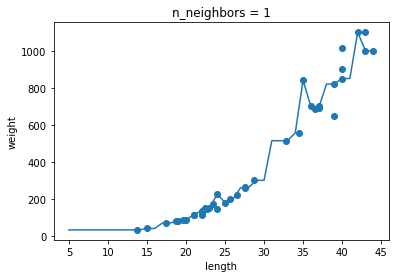

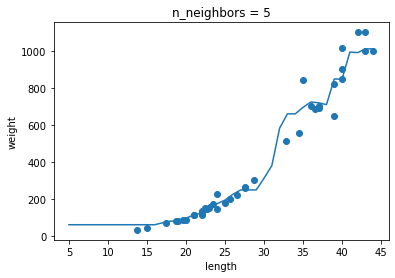

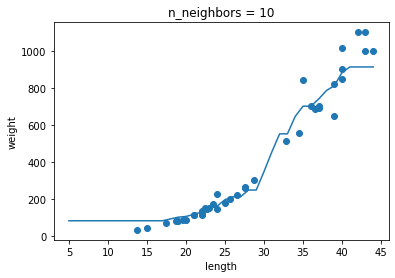

In [23]:
for n in [1,5,10]:
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    
    prediction = knr.predict(x)
    
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()

## 03-2 선형 회귀

In [24]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
train_input, test_input, train_target, test_target = \
                        train_test_split(perch_length, perch_weight, random_state=42)

In [27]:
train_input = train_input.reshape(-1,1) 
test_input = test_input.reshape(-1,1)

In [28]:
from sklearn.neighbors import KNeighborsRegressor

In [29]:
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [30]:
knr.predict([[50]])

array([1033.33333333])

In [31]:
import matplotlib.pyplot as plt

In [32]:
distances, indexes = knr.kneighbors([[50]])

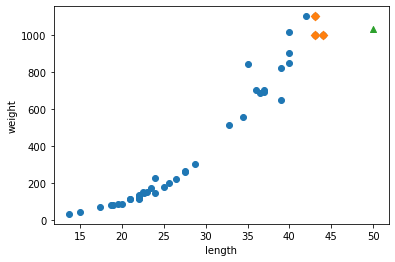

In [33]:
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [34]:
np.mean(train_target[indexes])

1033.3333333333333

In [35]:
knr.predict([[100]])

array([1033.33333333])

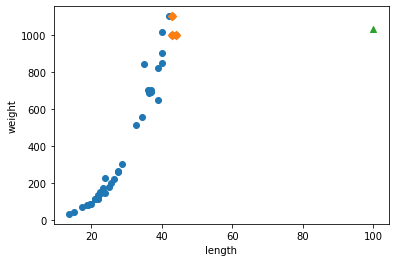

In [36]:
distances, indexes = knr.kneighbors([[100]])
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 선형 회귀

In [37]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_input, train_target)

LinearRegression()

In [38]:
lr.predict([[50]])

array([1241.83860323])

In [39]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


* 모델 기반 학습 : 최적의 모델 파라미터를 찾는 것
* 사례 기반 학습 : k-최근접 이웃에는 모델 파라미터가 없고, 훈련 세트를 저장하는 것이 훈련의 전부였음. 이와 같은 것을 사례 기반 학습

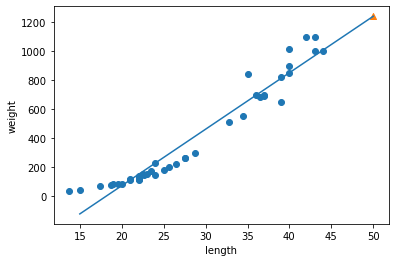

In [40]:
plt.scatter(train_input, train_target)
plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [41]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


In [42]:
train_poly = np.column_stack((train_input **2, train_input))

In [43]:
test_poly = np.column_stack((test_input **2, test_input))

In [44]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [45]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [46]:
lr.predict([[50**2, 50]])

array([1573.98423528])

In [47]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


In [48]:
point = np.arange(15,50)

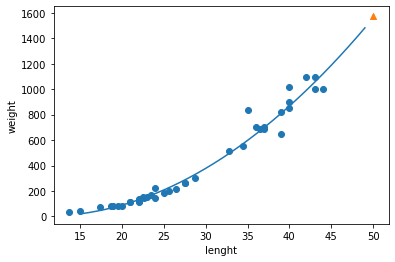

In [49]:
plt.scatter(train_input, train_target)
plt.plot(point, 1.01*point**2 - 21.6* point + 116.05)

plt.scatter(50,1574, marker='^')
plt.xlabel('lenght')
plt.ylabel('weight')
plt.show()

In [50]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325121


## 03-3 특성 공학과 규제

In [51]:
import pandas as pd

In [52]:
df = pd.read_csv('https://bit.ly/perch_csv_data')

In [53]:
perch_full = df.to_numpy()

In [54]:
perch_full

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

In [55]:
import numpy as np

In [56]:
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [57]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target =\
                train_test_split(perch_full, perch_weight, random_state=42)

In [58]:
### 사이킷런 변환기

In [59]:
from sklearn.preprocessing import PolynomialFeatures

In [60]:
poly = PolynomialFeatures()
poly.fit([[2,3]])
poly.transform([[2,3]])

array([[1., 2., 3., 4., 6., 9.]])

In [61]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
poly.transform([[2,3]])

array([[2., 3., 4., 6., 9.]])

In [62]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
train_poly.shape

(42, 9)

In [63]:
poly.get_feature_names_out()


array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [64]:
test_poly = poly.transform(test_input)

In [65]:
test_poly.shape

(14, 9)

In [66]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [67]:
lr.score(train_poly, train_target)

0.9903183436982126

In [68]:
lr.score(test_poly, test_target)

0.9714559911594146

In [69]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
train_poly.shape

(42, 55)

In [70]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [71]:
lr.score(train_poly, train_target)

0.9999999999938085

In [72]:
lr.score(test_poly, test_target)

-144.40744530429944

### 규제

In [73]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

* 릿지 : 계수를 제곱한 값을 기준으로 규제 적용(선호)
* 라쏘 : 계수의 절댓값을 기준으로 규제 적용

In [74]:
# 릿지

In [75]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
ridge.score(train_scaled, train_target)

0.9896101671037343

In [76]:
ridge.score(test_scaled, test_target)

0.9790693977615387

In [77]:
import matplotlib.pyplot as plt

In [78]:
train_score, test_score = [], []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

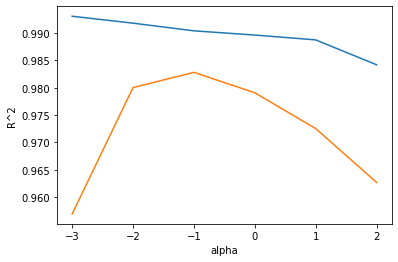

In [79]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [80]:
## alpha = 0.1로 선정

In [81]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570365
0.9827976465386975


In [82]:
# 라쏘

In [83]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
lasso.score(train_scaled, train_target)

0.989789897208096

In [84]:
lasso.score(test_scaled, test_target)

0.9800593698421884

In [85]:
train_score, test_score = [], []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

C:\Users\Dongyeon\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dongyeon\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


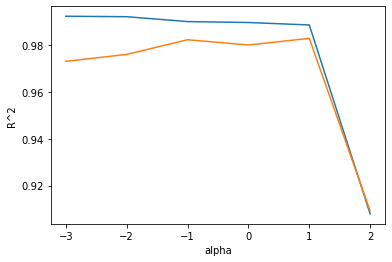

In [86]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [87]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [88]:
lasso.coef_

array([ 0.        ,  0.        ,  0.        , 12.14852453, 55.44856399,
       42.23100799,  0.        ,  0.        , 13.70596191,  0.        ,
       43.2185952 ,  5.7033775 , 47.46254536,  7.42309425, 11.85823365,
        0.        ,  0.        , 13.53038193, 21.22111356,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       18.66993032,  0.        ,  0.        ,  0.        , 15.81041778,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , 18.14672268,
        0.        ,  0.        ,  0.        ,  0.        , 15.51272953,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [89]:
np.sum(lasso.coef_==0)

40